In [2]:
from pathlib import Path
import csv
import matplotlib.pyplot as plt
from datetime import datetime

#Fehlerprüfung -> es zeigt einen Fehler, da irgendwo ein "" leerzeichen steht.

path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()   
reader = csv.reader(lines) 
header_row = next(reader)
    
dates, highs, lows = [], [], []

for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[3])
    low = int(row[4])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)
    
# print(plt.style.available)
    
# Stellt die Temperaturen graphisch dar    
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')
ax.plot(dates, lows, color='blue')

#Formatiert das Diagramm
plt.title('Daily High and Lows temperatures, 2021', fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

ValueError: invalid literal for int() with base 10: ''

Missing data for 2021-05-04 00:00:00


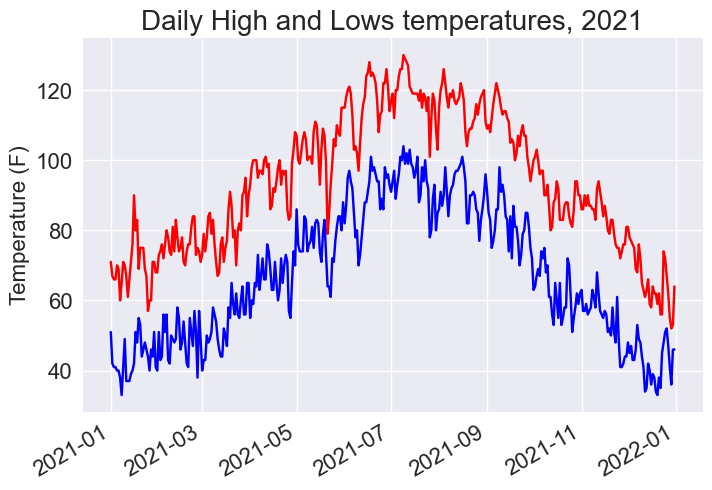

In [3]:
#Fehlerbehebung

path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()   
reader = csv.reader(lines) 
header_row = next(reader)
    
dates, highs, lows = [], [], []

for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[3])
        low = int(row[4])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)
    
# print(plt.style.available)
    
# Stellt die Temperaturen graphisch dar    
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')
ax.plot(dates, lows, color='blue')

#Formatiert das Diagramm
plt.title('Daily High and Lows temperatures, 2021', fontsize=20)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()